<font size="6"> <p style="text-align: center;">Evolution of the Quarterback Position in American Football</p>
<font size="5"> <p style="text-align: center;">Derek Miller</p>

<font size="5"> <p style="text-align: left;">Motivation and Importance</p>
<font size="3"> <p style="text-align: left;">
The sport of football is very much engrained and deeply rooted in American culture. It has become part of the country's identity, dominating television ratings every Sunday from September to February. The sport is a source of entertainment for millions of Americans, either through watching, playing, coaching, betting, etc. The National Football League (NFL) is the world's most popular (American) football league and is a multi-billion dollar business, showcasing just how much of an economic impact the sports industry has. Not only is it popular professionally, but many universities around the United States support having football teams. Football teams have provided numerous benefits to universities that have them, including:
- Increase in Revenue -> Through ticket sales, merchandise sales, and television contracts
- Improved Visibility -> Having a football team puts universities on the map. Many prospective students hear first of a universities football team before really knowing much about the school itself
- Community / Social Life -> Brings together students and alumni, is a source of social entertainment for students
- Recruiting -> Having a good football team may attract other high prospect athletes for other sports, improving the sports program for a university as a whole.

Likewise, professtional sports also has its benefits, and listed below are the pros of the National Football League (NFL):
- Entermainment ->  the NFL provides entertainment to millions of fans not only in the USA, but around the world. The league has expanded massively in the recent decades, and now games are even played in other countries, like the United Kingdom, Mexico, and Germany.
- Economic -> As stated above, the NFL is a multi-billion dollar business, but it has a significant impact on the job market. Not only do high-level atheletes and coaches get jobs, but there's also a countless amount of other jobs are created/ impacted like:
    - medical staff/trainers, nutritionists
    - sports writers/reporters/media staff 
    - advertisers/marketers 
    - restuarant owners and employees
    - tourism and hotel industry
    - construction industry
The sports teams bring in a massive amount of revenue for revenue for their city and state, impacting the entire community economically and culturally.
- Community -> NFL teams are actively involved in the city they're located, whether it's through different community events, outreach programs, and charity work. For instance, NFL Play-60 is a program for kids that encourages kids to be active for at least 60 minutes a day. Kids can go to these camps, meet their favorite sports players, and go have fun.

Often times the most important position in American football is the quarterback. The quarterback on a football team is like the conductor of an orchestra. They're responsible for directing the offense, relaying in plays to run, understanding everyone's roll on the field, reading the opposing defense, and serving as the overall leader and face of the franchise. Quarterbacks are typically the most recognizable player on a football field, and are widely considered the single most important position when deciding the outcome of a game. Thus, when studying how the game has changed over time, it it necessary to see how the quarterback position has evolved. In turn, understanding the history of the quarterback position will give coaches better insight into the current trends and patterns, leading to better developed game plans, strategies and techniques to improve performance both when facing against quarterbacks on defense and using them on offense.

This tutorial will analyze the quarterback position (NFL) by going through the Data Science Lifecycle:
1. Data Collection
2. Data Processing
3. Exploratory Analysis & Data Visualization
4. Model: Analysis, Hypothesis Testing, & ML
5. Interpretation: Insight & Policy Decision
</p> 

### Data Collection
The data being collected and analyzed is from [Pro Football Reference](https://www.pro-football-reference.com/). Pro Football Reference provides statistical data, analysis, and historical information in tabular format for various different football leagues (NFL, College, Canadian, etc.). We'll just be focusing on their passing data for NFL quarterbacks from 1932 to 2022. While the NFL started about a decade prior to 1932, passing statistics were not kept until 1932. Additionally, the statistics in 1932 are vastly different and incomplete compared to the statistics taken today, so linear regression will be used to predict certain statistics missing for certain years, based on other statistics for that year. Thus, there may be substantial bias for some statistics for earlier years, however the more modern years have more complete and detailed statistics. 

Also, to help understand the NFL's popularity over time, we will be analyzing Super Bowl viewership from 1967-Present. The Super Bowl is the championship game for the NFL that occurs at the end of each season. Every year, the Super Bowl is played to determine who the best team in the league is for that year. We will be extracting that data from [Nielsen](https://www.nielsen.com/news-center/2021/super-bowl-lv-draws-nearly-92-million-tv-viewers/) and also [Wikipedia](https://en.wikipedia.org/wiki/Super_Bowl_television_ratings#cite_note-TVWK_2004-25).

In [12]:
# Imports necessary for Data Collection
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import ElementClickInterceptedException
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

#### Extract Quaterback statistics, by Year (1932 - 2022)
First, we use Selenium, BeautifulSoup, and Pandas to read data from Pro Football Reference and store the necessary tabular data in a DataFrame object. We first start at the year 1932, extract and store the data, then automatically click the "Next Season" button until we've reached the most recent season, the 2022 season. Here, we're extracting statistics that'll help determine quarterback performance over time. These include passing yards, touchdowns, interceptions, quarterback rating, and so on. 

The comments in the code below explain step by step what the code is doing. I will provide a brief overview here. For each year (1932 to 2022), a webpage exists containing tabular data for every player that threw a pass for a certain year. We start at the webpage for 1932. After extracting and storing the passing data for a certain year in our DataFrame, we will click the "Next Season" button on the webpage, then repeat the data extraction steps for 1933. We do this for every next webpage until we get to the webpage representing the 2022 season. At this point, after extracting and storing the data for the 2022 season, there's no more seasons to extract data from, and so we stop. Note that while scraping, some pop-ups may occur. The code below handles this edge case by closing pop-ups when they appear.

#### IMPORTANT NOTE about Running Code:
Currently, running the code cell down below takes approximately 7 minutes. If this is too long, do the following steps to only test that it works for a sample of data. 
- STEP #1 -> Change... driver.get("https://www.pro-football-reference.com/years/1932/passing.htm")
             to... driver.get("https://www.pro-football-reference.com/years/2015/passing.htm")
    - Here, we're only extracting passing statistics from 2015 to present, a much smaller sample size
- STEP #2 -> Change... i = 1932 to... i = 2015
    - Here, we adjust the iterator to represent the desired start year, so break from the loop will occur after (2022 - 2015) iterations

In [ ]:
# Create instance of a Chrome web driver
driver = webdriver.Chrome()

# Call 'get()' method to open a URL in the browser window
driver.get("https://www.pro-football-reference.com/years/1932/passing.htm")

# Try to extract the data
try:
    # Create an empty DataFrame to store the data
    df_passing = pd.DataFrame()

    # Initialize start year
    i = 1932

    # Loop through / Extract data for each NFL season
    while i != 2023:
        # Wait some time in order to properly load each page
        time.sleep(3)
        
        # Use Beautiful Soup to extract the data from the table
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        # Find all HTML 'table' tags, we only want the first one (thus index 0)
        table = soup.find_all('table')[0]
        # Store the desired table's contents into a new DataFrame object
        temp_df = pd.read_html(str(table))[0]
        # Add a column called 'year' to the DataFrame
        temp_df['year'] = i
        
        # Concatenate the DataFrame for the current year to the preexisting DataFrame
        # that stores information for all the years (we're continuosly building 'df'
        # from scratch)
        df_passing = pd.concat([df_passing, temp_df], ignore_index=True)

        # Increment the current year by 1, break once we reached the most recent season
        i += 1
        if i == 2023:
            break

        # Find the 'Next Season' button on the current webpage, if it exists
        try:
            next_button = driver.find_element("link text", "Next Season")
            next_button.click()

        # If it doesn't exist in that we get a Pop-Up, close that Pop-Up and proceed 
        # to clicking 'Next Season'.
        except (NoSuchElementException, ElementClickInterceptedException):
            try:
                close_button = driver.find_element("class name", "closer")
                close_button.click()
                next_button = driver.find_element("link text", "Next Season")
                next_button.click()
            except NoSuchElementException:
                pass
    # Close the Web Driver once we're done extracting data from the current page
    driver.close()

    # View the final DataFrame
    print(df_passing.tail(50))
    df_passing.to_csv('nfl_passing.csv', index=False)
except:
    # Close the Web Driver just in case any errors occur
    driver.close()
    raise

       Rk                Player   Tm  Age  Pos   G  GS  QBrec  Cmp  Att  ...  \
7796   59          Malik Willis  TEN   23   QB   8   3  1-2-0   31   61  ...   
7797   Rk                Player   Tm  Age  Pos   G  GS  QBrec  Cmp  Att  ...   
7798   60           Taysom Hill  NOR   32   TE  16   8    NaN   13   19  ...   
7799   61            Nick Foles  IND   33   QB   3   2  0-2-0   25   42  ...   
7800   62          Nick Mullens  MIN   27   QB   4   0    NaN   21   25  ...   
7801   63           Jordan Love  GNB   24   QB   4   0    NaN   14   21  ...   
7802   64            Trey Lance  SFO   22   QB   2   2  1-1-0   15   31  ...   
7803   65        Trevor Siemian  CHI   31   QB   2   1  0-1-0   15   26  ...   
7804   66            Sam Howell  WAS   22   QB   1   1  1-0-0   11   19  ...   
7805   67            Davis Webb  NYG   27   QB   1   1  0-1-0   23   40  ...   
7806   68         Bryce Perkins  LAR   26   QB   5   1  0-1-0   19   34  ...   
7807   69       Nathan Peterman  CHI   2

In [ ]:
# Create instance of a Chrome web driver
driver = webdriver.Chrome()

# Call 'get()' method to open a URL in the browser window
driver.get("https://www.pro-football-reference.com/years/1932/rushing.htm")

# Try to extract the data
try:
    # Create an empty DataFrame to store the data
    df_rushing = pd.DataFrame()

    # Initialize start year
    i = 1932

    # Loop through / Extract data for each NFL season
    while i != 2023:
        # Wait some time in order to properly load each page
        time.sleep(3)
        
        # Use Beautiful Soup to extract the data from the table
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        # Find all HTML 'table' tags, we only want the first one (thus index 0)
        table = soup.find_all('table')[0]
        # Store the desired table's contents into a new DataFrame object
        temp_df = pd.read_html(str(table))[0]
        # Add a column called 'year' to the DataFrame
        temp_df['year'] = i
        
        # Concatenate the DataFrame for the current year to the preexisting DataFrame
        # that stores information for all the years (we're continuosly building 'df'
        # from scratch)
        df_rushing = pd.concat([df_rushing, temp_df], ignore_index=True)

        # Increment the current year by 1, break once we reached the most recent season
        i += 1
        if i == 2022:
            break

        # Find the 'Next Season' button on the current webpage, if it exists
        try:
            next_button = driver.find_element("link text", "Next Season")
            next_button.click()

        # If it doesn't exist in that we get a Pop-Up, close that Pop-Up and proceed 
        # to clicking 'Next Season'.
        except (NoSuchElementException, ElementClickInterceptedException):
            try:
                close_button = driver.find_element("class name", "closer")
                close_button.click()
                next_button = driver.find_element("link text", "Next Season")
                next_button.click()
            except NoSuchElementException:
                pass
    # Close the Web Driver once we're done extracting data from the current page
    driver.close()

    # View the final DataFrame
    print(df_rushing.tail(50))
    df_rushing.to_csv('nfl_rushing.csv', index=False)
except:
    # Close the Web Driver just in case any errors occur
    driver.close()
    raise

      Unnamed: 0_level_0  Unnamed: 1_level_0 Unnamed: 2_level_0  \
                      Rk              Player                 Tm   
21435                324         Evan Engram                NYG   
21436                325           Zach Ertz                2TM   
21437                326         Mike Evans*                TAM   
21438                327   Clayton Fejedelem                MIA   
21439                328     Maurice Ffrench                LAC   
21440                329    Ryan Fitzpatrick                WAS   
21441                 Rk              Player                 Tm   
21442                330        Jamie Gillan                CLE   
21443                331       Cyril Grayson                TAM   
21444                332       Johnny Hekker                LAR   
21445                333      DeSean Jackson                2TM   
21446                334      Christian Kirk                ARI   
21447                335           Cole Kmet                CH

### Data Processing
Now we need to clean up our data and tables. Some of the tasks we need to do to clean up our data include:
- Filtering out non-quarterback positions
- Removing certain characters from data entries in certain columns
- Split certain column(s) into multiple columns
- Deal with Null Values 

We've made 5 distinct DataFrames that we'll use to analyze:
- df_passing -> Yearly Quarterback Passing Statistics (1932 - 2022)
- df_rushing -> Yearly Quarterback Rushing Statistics (1932 - 2022)
- df_players -> Career Quarterback Passing Statistics (1932 - 2022)
- df_players1 -> Career Quarterback Rushing Statistics (1932 - 2022)
- players -> Career Quarterback Passing & Rushing Statistics 1932 - 2022
    - NOTE -> We're only including rushing statistics for quarterbacks that are also top passers. Top passers here means a starting quarterback. This definition gets a little muddier when considering quarterbacks in the 1930s and 1940s, when the position wasn't fully defined yet. Thus, passers from this era may have missing rushing statistics. 

In [5]:
# Read in the CSVs that were created above
df_passing = pd.read_csv('nfl_passing.csv')
df_rushing = pd.read_csv('nfl_rushing.csv', header=1)

# Drop unnecessary rushing statistics for quarterbacks
del df_rushing['GS']
del df_rushing['Fmb']
del df_rushing['Fmb.1']

# Rename column(s):
df_passing = df_passing.rename(columns={'Yds.1': 'Yds_Sk'})
df_rushing = df_rushing.rename(columns={'Unnamed: 14':'year', 'Att':'Rush_Att', 'Yds':'Rush_Yds', 'TD':'Rush_TD', '1D':'Rush_1D', 'Lng':'Rush_Lng',
                                        'Y/A':'Rush_Y/A', 'Y/G':'Rush_Y/G'})

# Only identify players that actually played positions that pass the ball for AFTER 1950 inclusive (Quarterback and Tailback)
# by using Boolean Indexing
# Note -> Tailbacks and Fullbacks early on (1930s, 1940s) regularly acted as the "Quarterback"

filter1 = df_passing['Pos'] == 'QB'
filter2 = df_passing['Pos'] == 'TB'
filter3 = df_passing['year'] >= 1950
filter4 = df_passing['year'] < 1950
filter5 = filter3 & (filter1 | filter2)

filter6 = df_rushing['Pos'] == 'QB'
filter7 = df_rushing['Pos'] == 'TB'
filter8 = df_rushing['year'] >= 1950
filter9 = df_rushing['year'] < 1950
filter10 = filter8 & (filter6 | filter7)

# Create a new DataFrames for Passing statistics and Rushing statistics
df_passing = df_passing[filter4 | filter5].reset_index(drop=True)
df_rushing = df_rushing[filter9 | filter10].reset_index(drop=True)

# Deal with 'NaN' values:
df_passing.fillna(0, inplace=True)
df_rushing.fillna(0, inplace=True)

# Drop Header rows that were accidentally copied over
df_passing = df_passing.drop(df_passing[df_passing['Rk'] == 'Rk'].index)
df_rushing = df_rushing.drop(df_rushing[df_rushing['Rk'] == 'Rk'].index)

# Split the 'QBrec' column based on '-'
df_passing[['Wins', 'Losses', 'Ties']] = df_passing['QBrec'].str.split('-', expand=True)
# Drop the original 'QBrec' column
df_passing.drop('QBrec', axis=1, inplace=True)
df_passing

# Include Pro-Bowl / All-Pro Information
df_passing['All-Pro'] = df_passing['Player'].apply(lambda x: True if '+' in str(x) else False)
df_passing['Pro-Bowl'] = df_passing['Player'].apply(lambda x: True if '*' in str(x) else False)
df_rushing['All-Pro'] = df_rushing['Player'].apply(lambda x: True if '+' in str(x) else False)
df_rushing['Pro-Bowl'] = df_rushing['Player'].apply(lambda x: True if '*' in str(x) else False)

# Remove Characters from certain columns
# Iterate through the rows and edit the 'City' column
for index, row in df_passing.iterrows():
    player = row['Player']

    player = player.replace('+', '')  # remove the +, 
    player = player.replace('*', '')  # remove the *, 

    player = player.strip()  # remove leading/trailing spaces
    df_passing.at[index, 'Player'] = player  # update the DataFrame

for index, row in df_rushing.iterrows():
    player = row['Player']

    player = player.replace('+', '')  # remove the +, 
    player = player.replace('*', '')  # remove the *, 

    player = player.strip()  # remove leading/trailing spaces
    df_rushing.at[index, 'Player'] = player  # update the DataFrame

# Get unique team codes:
unique_team_codes = df_passing['Tm'].unique().tolist()

# Drop all rows where col2 has value '2TM'
df_passing = df_passing.drop(df_passing[df_passing['Tm'] == '2TM'].index).reset_index(drop=True)
df_rushing = df_rushing.drop(df_rushing[df_rushing['Tm'] == '2TM'].index).reset_index(drop=True)

year_dict = {1932: 8, 
            1933: 10,
            1934: 11,
            1935: 9,
            1936: 9,
            1936: 10,
            1937: 10,
            1938: 10,
            1939: 10,
            1940: 10,
            1941: 10,
            1942: 10,
            1943: 10,
            1944: 10,
            1945: 10,
            1946: 10,
            1947: 10,
            1948: 10,
            1949: 10,
            1950: 13,
            1951: 12,
            1952: 12,
            1953: 12,
            1954: 12,
            1955: 12,
            1956: 12,
            1957: 12,
            1958: 12,
            1959: 12,
            1960: 13,
            1961: 14,
            1962: 14,
            1963: 14,
            1964: 14,
            1965: 14,
            1966: 15,
            1967: 16,
            1968: 16,
            1969: 16,
            1970: 26,
            1971: 26,
            1972: 26,
            1973: 26,
            1974: 26,
            1975: 26,
            1976: 28,
            1977: 28,
            1978: 28,
            1979: 28,
            1980: 28,
            1981: 28,
            1982: 28,
            1983: 28,
            1984: 28,
            1985: 28,
            1986: 28,
            1987: 28,
            1988: 28,
            1989: 28,
            1990: 28,
            1991: 28,
            1992: 28,
            1993: 28,
            1994: 28,
            1995: 30,
            1996: 30,
            1997: 30,
            1998: 30,
            1999: 31,
            2000: 31,
            2001: 31,
            2002: 32,
            2003: 32,
            2004: 32,
            2005: 32,
            2006: 32,
            2007: 32,
            2008: 32,
            2009: 32,
            2010: 32,
            2011: 32,
            2012: 32,
            2013: 32,
            2014: 32,
            2015: 32,
            2016: 32,
            2017: 32,
            2018: 32,
            2019: 32,
            2020: 32,
            2021: 32,
            2022: 32}

# Change the data type of ALL the columns in the DataFrames
df_passing = df_passing.astype({
    'Rk': int,
    'Player': str,
    'Tm': str,
    'Age': int,
    'Pos': str,
    'G': int,
    'GS': int,
    'Cmp': int,
    'Att': int,
    'Cmp%': np.float64,
    'Yds': int,
    'TD': int,
    'TD%': np.float64,
    'Int': int,
    'Int%': np.float64,
    '1D': int,
    'Lng': int,
    'Y/A': np.float64,
    'AY/A': np.float64,
    'Y/C': np.float64,
    'Y/G': np.float64,
    'Rate': np.float64,
    'QBR': np.float64,
    'Sk': int,
    'Sk%': np.float64,
    'Yds_Sk': int,
    'NY/A': np.float64,
    'ANY/A': np.float64,
    '4QC': int,
    'GWD': int
})

df_rushing = df_rushing.astype({
    'Rk': int,
    'Player': str,
    'Tm': str,
    'Age': int,
    'Pos': str,
    'G': int,
    'Rush_Att': int,
    'Rush_Yds': int,
    'Rush_TD': int,
    'Rush_1D': int,
    'Rush_Lng': int,
    'Rush_Y/A': np.float64,
    'Rush_Y/G': np.float64,
    'year': int
})

# Only Keep a Certain amount of Quarterbacks per year (32 for Passing Stats, 10 for Rushing Stats)
def rows_kept(group):
    return group.head(year_dict[group.name])

df_passing = df_passing.groupby('year').apply(lambda x: rows_kept(x))
df_rushing = df_rushing.groupby('year').apply(lambda x: rows_kept(x))   
#df_rushing = df_rushing.groupby('year').apply(lambda x: x.nsmallest(10, 'Rk'))   

# Instantiate Player DataFrames            
df_players = df_passing.groupby('Player')['year'].agg(['min', 'max']).reset_index()
df_players2 = df_rushing.groupby('Player')['year'].agg(['min', 'max']).reset_index()

# Merge DataFrames to add min/max year columns to original DataFrames
df_passing = pd.merge(df_passing, df_players, how='left', on='Player')
df_rushing = pd.merge(df_rushing, df_players2, how='left', on='Player')

# Calculate grouped column values
df_players = df_passing.groupby('Player').agg({'Rk': 'count', 'GS': 'sum', 'Cmp': 'sum', 'Yds': 'sum', 'Att': 'sum', 'TD': 'sum', 'Int': 'sum', 'Lng': 'max', 'Sk': 'sum', 'Yds_Sk': 'sum', '4QC': 'sum', 
                                               'GWD':'sum', 'year': 'min'})
df_players['Cmp%'] = df_players['Cmp'] / df_players['Att']
df_players['TD%'] = df_players['TD'] / df_players['Att']
df_players['Int%'] = df_players['Int'] / df_players['Att']
df_players['Y/A'] = df_players['Yds'] / df_players['Att']
df_players['AY/A'] = (df_players['Yds'] + 20*df_players['TD'] - 45*df_players['Int']) / df_players['Att']   
df_players['Y/C'] = df_players['Yds'] / df_players['Cmp']
df_players['Y/G'] = df_players['Yds'] / df_players['GS']
df_players['Sk%'] = df_players['Sk'] / (df_players['Sk'] + df_players['Att'])
df_players['NY/A'] = df_players['Sk'] / (df_players['Att'] + df_players['Sk'])
df_players['ANY/A'] = (df_players['Yds'] - df_players['Yds_Sk'] + ((20*df_players['TD']) - (45*df_players['Int']))) / (df_players['Att'] + df_players['Sk'])

# Passer Rating Formula
a = ((df_players['Cmp'] / df_players['Att']) - 0.3)*5
b = ((df_players['Yds'] / df_players['Att']) - 3)*0.25
c = (df_players['TD'] / df_players['Att'])*20
d = 2.375 - ((df_players['Int'] / df_players['Att'])*25)
df_players['Rate'] = ((a + b + c + d)/6)*100

df_players2 = df_rushing.groupby('Player').agg({'Rk': 'count', 'G': 'sum', 'Rush_Yds': 'sum', 'Rush_Att': 'sum', 'Rush_TD': 'sum', 'Rush_Lng': 'max', 'year': 'min'})
df_players2['Rush_Y/A'] = df_players2['Rush_Yds'] / df_players2['Rush_Att']
df_players2['Rush_Y/G'] = df_players2['Rush_Yds'] / df_players2['G']

# Create Pro-Bowl DataFrame
true_probowl = df_passing[df_passing['Pro-Bowl']]
true_probowl = true_probowl.sort_values(by='Player')
true_probowl = true_probowl.groupby('Player').agg({'Pro-Bowl': 'count'})

# Create All-Pro DataFrame
true_allpro = df_passing[df_passing['All-Pro']]
true_allpro = true_allpro.sort_values(by='Player')
true_allpro = true_allpro.groupby('Player').agg({'All-Pro': 'count'})

# Merge these DataFrames with the original Passing Players DataFrame
df_players = pd.merge(df_players, true_probowl, how='left', on='Player')
df_players = pd.merge(df_players, true_allpro, how='left', on='Player')

# Clean-Up Passing_Players NaN and Decimal entries
df_players['Pro-Bowl'] = df_players['Pro-Bowl'].fillna(0)
df_players['All-Pro'] = df_players['All-Pro'].fillna(0)
df_players['Cmp%'] = df_players['Cmp%'].round(2)
df_players['TD%'] = df_players['TD%'].round(2)
df_players['Int%'] = df_players['Int%'].round(2)
df_players['Y/A'] = df_players['Y/A'].round(2)
df_players['AY/A'] = df_players['AY/A'].round(2)
df_players['Y/C'] = df_players['Y/C'].round(2)
df_players['Y/G'] = df_players['Y/G'].round(2)
df_players['Rate'] = df_players['Rate'].round(2)
df_players['Sk%'] = df_players['Sk%'].round(2)
df_players['NY/A'] = df_players['NY/A'].round(2)
df_players['ANY/A'] = df_players['ANY/A'].round(2)

# Change type of newly added columns
df_players = df_players.astype({
    'Pro-Bowl': int,
    'All-Pro': int})

# Sort Quarterbacks by Year
df_players = df_players.sort_values(by='year')
df_players2 = df_players2.sort_values(by='year', ascending=False)
# Merge Passing and Rushing statistics for Quarterbacks
# Note -> Top Quarterbacks are NOT necessarily top Top Rushers, and vice versa, 
# so some null rushing data will exist for now, we'll denote that with 0 for
# rushing columns
players = pd.merge(df_players, df_players2, how='left', on='Player')
del players['Rk_y']
del players['G']
del players['year_y']
players.fillna(0, inplace=True)
players = players.astype({
    'Rush_Yds': int,
    'Rush_Att': int,
    'Rush_TD': int,
    'Rush_Lng': int,
})
players['Rush_Y/A'] = players['Rush_Y/A'].round(2)
players['Rush_Y/G'] = players['Rush_Y/G'].round(2)
players.iloc[:, :].head(50)
players = players.rename(columns={'Rk_x': 'Rk', 'year_x':'year'})
print(players.dtypes)

Rk            int64
GS            int32
Cmp           int32
Yds           int32
Att           int32
TD            int32
Int           int32
Lng           int32
Sk            int32
Yds_Sk        int32
4QC           int32
GWD           int32
year          int64
Cmp%        float64
TD%         float64
Int%        float64
Y/A         float64
AY/A        float64
Y/C         float64
Y/G         float64
Sk%         float64
NY/A        float64
ANY/A       float64
Rate        float64
Pro-Bowl      int32
All-Pro       int32
Rush_Yds      int32
Rush_Att      int32
Rush_TD       int32
Rush_Lng      int32
Rush_Y/A    float64
Rush_Y/G    float64
dtype: object


In [6]:
df_passing

,Rk,Player,Tm,Age,Pos,G,GS,Cmp,Att,Cmp%,...,year,1D,QBR,Wins,Losses,Ties,All-Pro,Pro-Bowl,min,max
0,1,Arnie Herber,GNB,22,TB,14,8,37,101,36.6,...,1932,0,0.0,NaN,NaN,NaN,True,False,1932,1945
1,2,Walt Holmer,CRD,30,0,10,4,25,78,32.1,...,1932,0,0.0,NaN,NaN,NaN,False,False,1932,1932
2,4,Keith Molesworth,CHI,27,QB,14,14,25,64,39.1,...,1932,0,0.0,NaN,NaN,NaN,False,False,1932,1935
3,5,Benny Friedman,BKN,27,TB,11,10,23,74,31.1,...,1932,0,0.0,NaN,NaN,NaN,False,False,1932,1933
4,6,Dutch Clark,PRT,26,TB,11,9,17,52,32.7,...,1932,0,0.0,NaN,NaN,NaN,True,False,1932,1936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,28,Marcus Mariota,ATL,29,QB,13,13,184,300,61.3,...,2022,111,55.6,5,8,0,False,False,2015,2022
2014,30,Matthew Stafford,LAR,34,QB,9,9,206,303,68.0,...,2022,105,50.3,3,6,0,False,False,2009,2022
2015,31,Taylor Heinicke,WAS,29,QB,9,9,161,259,62.2,...,2022,93,44.4,5,3,1,False,False,2021,2022
2016,32,Carson Wentz,WAS,30,QB,8,7,172,276,62.3,...,2022,85,32.9,2,5,0,False,False,2016,2022


In [7]:
df_rushing

,Rk,Player,Tm,Age,Pos,G,Rush_Att,Rush_Yds,Rush_TD,Rush_Lng,Rush_Y/A,Rush_Y/G,year,Rush_1D,All-Pro,Pro-Bowl,min,max
0,1,Cliff Battles,BOS,22,TB,8,148,576,3,0,3.9,72.0,1932,0,False,False,1932,1937
1,2,Dutch Clark,PRT,26,TB,11,137,461,3,0,3.4,41.9,1932,0,True,False,1932,1936
2,3,Doug Wycoff,SIS,29,BB,12,135,454,1,0,3.4,37.8,1932,0,False,False,1932,1934
3,4,Jack Grossman,BKN,23,FB,12,129,323,2,0,2.5,26.9,1932,0,False,False,1932,1932
4,5,Bronko Nagurski,CHI,24,FB,14,121,533,4,0,4.4,38.1,1932,0,True,False,1932,1936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,123,Matthew Stafford,LAR,33,QB,17,32,43,0,12,1.3,2.5,2021,8,False,False,2009,2021
1982,124,Jameis Winston,NOR,27,QB,7,32,166,1,20,5.2,23.7,2021,17,False,False,2015,2021
1983,125,Teddy Bridgewater,DEN,29,QB,14,30,106,2,13,3.5,7.6,2021,16,False,False,2014,2021
1984,126,Kirk Cousins,MIN,33,QB,16,29,115,1,29,4.0,7.2,2021,8,False,True,2015,2021


In [8]:
df_players

,Rk,GS,Cmp,Yds,Att,TD,Int,Lng,Sk,Yds_Sk,...,Y/A,AY/A,Y/C,Y/G,Sk%,NY/A,ANY/A,Rate,Pro-Bowl,All-Pro
Player,,,,,,,,,,,,,,,,,,,,,
Keith Molesworth,4,30,70,1294,189,13,15,0,0,0,...,6.85,4.65,18.49,43.13,0.00,0.00,4.65,51.33,0,0
Jack Grossman,1,9,11,178,32,0,3,0,0,0,...,5.56,1.34,16.18,19.78,0.00,0.00,1.34,14.84,0,0
Glenn Presnell,2,16,67,1033,171,8,16,0,0,0,...,6.04,2.77,15.42,64.56,0.00,0.00,2.77,36.51,0,1
Benny Friedman,2,15,65,913,154,10,17,0,0,0,...,5.93,2.26,14.05,60.87,0.00,0.00,2.26,37.61,0,0
John Doehring,1,0,10,203,26,2,1,0,0,0,...,7.81,7.62,20.30,inf,0.00,0.00,7.62,76.28,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Jalen Hurts,2,30,571,6845,892,38,15,91,64,381,...,7.67,7.77,11.99,228.17,0.07,0.07,6.85,94.60,1,0
Trevor Lawrence,2,34,746,7754,1186,37,25,59,59,422,...,6.54,6.21,10.39,228.06,0.05,0.05,5.58,83.36,1,0
Mac Jones,2,31,640,6798,963,36,24,75,62,472,...,7.06,6.69,10.62,219.29,0.06,0.06,5.82,88.96,1,0


In [9]:
df_players2

,Rk,G,Rush_Yds,Rush_Att,Rush_TD,Rush_Lng,year,Rush_Y/A,Rush_Y/G
Player,,,,,,,,,
Zach Wilson,1,13,185,29,4,52,2021,6.379310,14.230769
Mac Jones,1,17,129,44,0,13,2021,2.931818,7.588235
Taylor Heinicke,1,16,313,60,1,38,2021,5.216667,19.562500
Justin Fields,1,12,420,72,2,23,2021,5.833333,35.000000
Tyler Huntley,1,7,294,47,2,21,2021,6.255319,42.000000
...,...,...,...,...,...,...,...,...,...
Ken Strong,2,24,806,234,8,0,1932,3.444444,33.583333
Bob Campiglio,1,11,504,104,2,0,1932,4.846154,45.818182
Doug Wycoff,2,24,780,241,2,0,1932,3.236515,32.500000


In [10]:
players

,Rk,GS,Cmp,Yds,Att,TD,Int,Lng,Sk,Yds_Sk,...,ANY/A,Rate,Pro-Bowl,All-Pro,Rush_Yds,Rush_Att,Rush_TD,Rush_Lng,Rush_Y/A,Rush_Y/G
Player,,,,,,,,,,,,,,,,,,,,,
Keith Molesworth,4,30,70,1294,189,13,15,0,0,0,...,4.65,51.33,0,0,0,0,0,0,0.00,0.00
Jack Grossman,1,9,11,178,32,0,3,0,0,0,...,1.34,14.84,0,0,323,129,2,0,2.50,26.92
Glenn Presnell,2,16,67,1033,171,8,16,0,0,0,...,2.77,36.51,0,1,935,226,13,0,4.14,38.96
Benny Friedman,2,15,65,913,154,10,17,0,0,0,...,2.26,37.61,0,0,0,0,0,0,0.00,0.00
John Doehring,1,0,10,203,26,2,1,0,0,0,...,7.62,76.28,0,0,0,0,0,0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Jalen Hurts,2,30,571,6845,892,38,15,91,64,381,...,6.85,94.60,1,0,1138,202,13,31,5.63,37.93
Trevor Lawrence,2,34,746,7754,1186,37,25,59,59,422,...,5.58,83.36,1,0,334,73,2,26,4.58,19.65
Mac Jones,2,31,640,6798,963,36,24,75,62,472,...,5.82,88.96,1,0,129,44,0,13,2.93,7.59


### Exploratory Analysis & Data Visualization

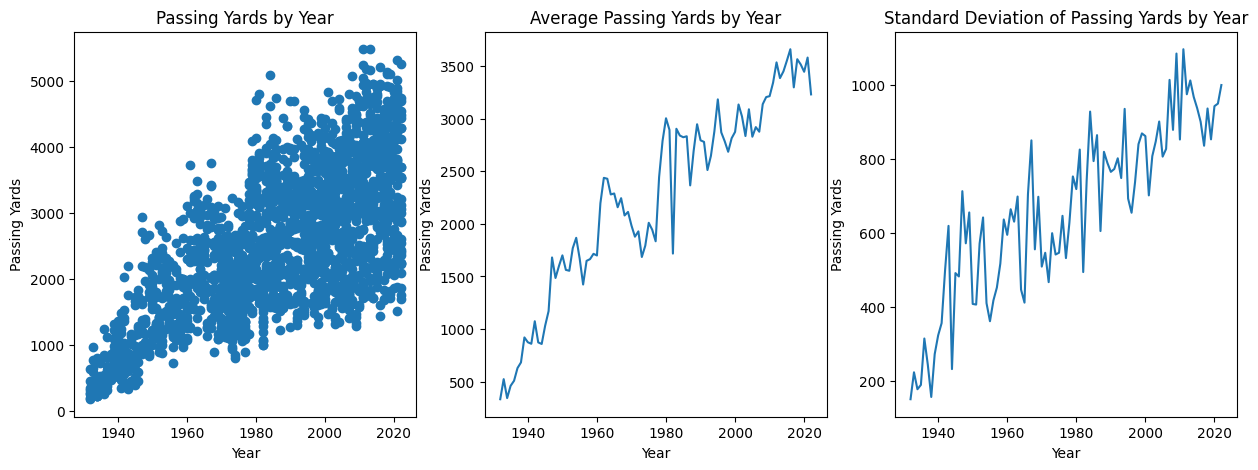

In [25]:
def make_plots(X, Y, xlabel, ylabel, groupby_col, dependent_col):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].scatter(X, Y)
    axs[0].set_title(f"{ylabel} by {xlabel}")
    axs[0].set_xlabel(xlabel)
    axs[0].set_ylabel(ylabel)

    df_mean = df_passing.groupby(groupby_col)[dependent_col].mean()
    axs[1].plot(df_mean.index, df_mean.values)
    axs[1].set_title(f"Average {ylabel} by {xlabel}")
    axs[1].set_xlabel(xlabel)
    axs[1].set_ylabel(ylabel)

    df_std = df_passing.groupby(groupby_col)[dependent_col].std()
    axs[2].plot(df_std.index, df_std.values)
    axs[2].set_title(f"Standard Deviation of {ylabel} by {xlabel}")
    axs[2].set_xlabel(xlabel)
    axs[2].set_ylabel(ylabel)

    plt.show()

make_plots(df_passing['year'], df_passing['Yds'], 'Year', 'Passing Yards', 'year', 'Yds')

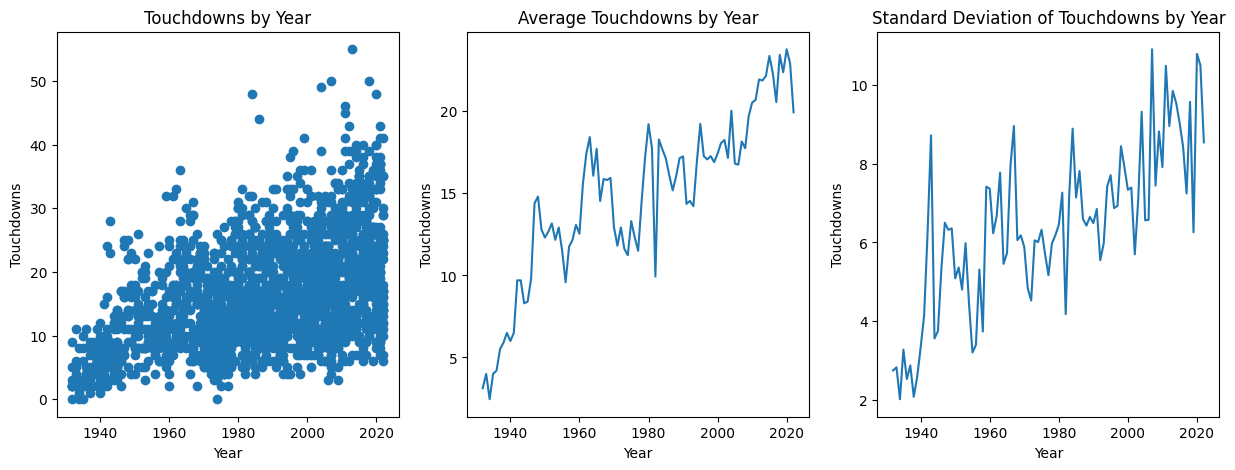

In [27]:
make_plots(df_passing['year'], df_passing['TD'], 'Year', 'Touchdowns', 'year', 'TD')

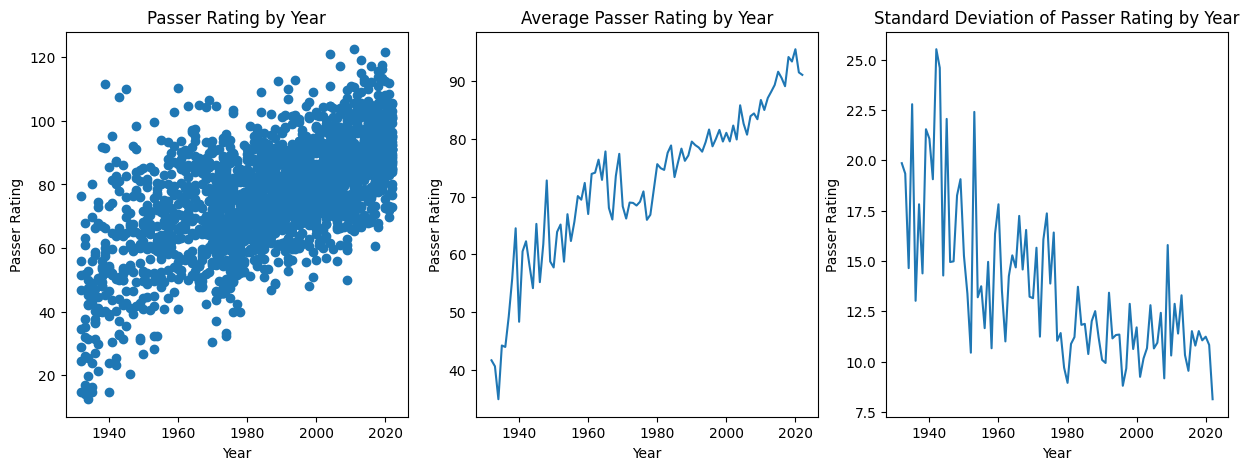

In [28]:
make_plots(df_passing['year'], df_passing['Rate'], 'Year', 'Passer Rating', 'year', 'Rate')

In [ ]:
make_plots(df_passing['year'], df_passing['Int'], 'Year', 'Interceptions', 'year', 'Int')